In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Acesso da Base de Dados no dia: 11/10/2021

In [2]:
df = pd.read_csv("Manaus.csv", sep = ";", low_memory = False)

# 2.1 Visão Geral dos Casos Confirmados

#### Filtrando apenas os casos confirmados.

In [3]:

#Filtrando apenas os casos confirmados.
filtro  = df['_classificacao'] == "Confirmado"
confirmados = df[filtro]
df = confirmados 

#### 1. Quantos atributos descrevem cada exemplo? Quais são eles?

In [4]:
qtd_atributos =    len(df.columns)
atributos     =    list(df.columns)
lst_atributos = ""
for i in atributos:
    lst_atributos += i + "\n"

print("Cada exemplo possui "+str(qtd_atributos)+" atributos ,são eles: \n"+lst_atributos )

Cada exemplo possui 39 atributos ,são eles: 
_dt_evolucao
_dt_notificacao
_dt_sintomas
_classificacao
_conclusao
_origem
_comorb_cardio
_comorb_cromossomica
_comorb_diabetes
_comorb_hemato
_comorb_hepatica
_comorb_imuno
_comorb_neurologica
_comorb_obessidade
_comorb_renal
_comorb_respiratoria
_criterio
_etnia
_evolução
_idade
_faixa etária
_gestante
_profiss_saude
_raca
_se_notificacao
_sexo
_sintoma_dispneia
_sintoma_febre
_sintoma_garganta
_sintoma_tosse
_sintoma_outros
_srag
_teste_anticorpo
_teste_antigeno
_teste_pcr
_bairro
_bairro_mapa
_distrito
_taxa



#### 2. Quantos casos confirmados há em Manaus, cumulativamente?

In [5]:
casos_confirmados = len(df)
casos_confirmados
print("Existem "+str(casos_confirmados)+" casos confirmados.")

Existem 80420 casos confirmados.


#### 3-  A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o
mais recente? Leve em conta a data de notificação.

In [6]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'])
dt_antiga             = df['_dt_notificacao'].min()
dt_recente            = df['_dt_notificacao'].max()
print("A base de dados está compreendida entre as datas, "+str(dt_antiga)+" e "+str(dt_recente))


A base de dados está compreendida entre as datas, 2020-01-04 00:00:00 e 2020-12-29 00:00:00


### Para fins da análise considerada no escopo deste projeto, vamos excluir todos os atributos relativos às comorbidades, sintomas, etnia, profissão, outras datas que não a de notificação, origem e outros que não estiverem envolvidos no contexto do trabalho solicitado. Estes atributos serão considerados irrelevantes para fins de simplificação. Exclua todas as linhas em que houver dados faltantes para os atributos remanescentes.

In [7]:
df = df.drop(df.filter(regex='comorb|sintoma|etnia|profissão|dt_evolucao|dt_sintomas|origem|raca|gestante|srag|_profiss_saude|criterio|evolução|faixa_etaria|teste|taxa|faixa|se_notificacao').columns, axis=1).dropna()


#### 1. Quantos exemplos e atributos há na base de dados após a limpeza e organização?

In [8]:
exemplos  = len(df)
atributos = len(df.columns)
print("Existem "+str(exemplos)+" exemplos e , "+str(atributos)+" atributos")

Existem 41675 exemplos e , 8 atributos


#### 2. Qual a porcentagem de indivíduos recuperados em relação ao todo.

In [9]:
recuperados  = (df._conclusao == 'Recuperado').sum()
total        = len(df)
porc         = recuperados / total*100
print("Total de recuperados em porcentagem "+str(porc)+"%")

Total de recuperados em porcentagem 91.89202159568086%


#### 3. Os casos acometeram mais indivíduos do sexo masculino ou feminino?

R = Indivíduos do sexo feminino.

In [10]:
df['_sexo'].value_counts()

F    22357
M    19318
Name: _sexo, dtype: int64

#### 4. Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [11]:
media_idade         = np.mean(df['_idade'])
desvio_padrão       = np.std(df['_idade'])
jovem                = np.min(df['_idade'])
idoso               = np.max(df['_idade'])
print( "A média de idade: "+str(media_idade)+
       "\nDesvio padrão: "+str(desvio_padrão)+
       "\nO indivíduo mais jovem: "+str(jovem)+
       "\nO indivíduo mais idoso: "+str(idoso)

      )

A média de idade: 43.47652069586083
Desvio padrão: 17.376150335788605
O indivíduo mais jovem: 0.0
O indivíduo mais idoso: 120.0


#### 5. Qual o bairro com maior incidência de casos?

In [12]:
bairro_maior     = df['_bairro'].value_counts().index[0]
qtd_bairro_maior = df['_bairro'].value_counts()[0]
print("bairro com maior incidencia: "+str(bairro_maior))

bairro com maior incidencia: SAO JOSE OPERARIO


#### 6. Quais os três bairros com maior incidência de casos recuperados?

In [13]:
incidencias = list(df['_bairro'].value_counts().index[:3])
print("3 bairros com maior incidencias: "+str(incidencias))

3 bairros com maior incidencias: ['SAO JOSE OPERARIO', 'JORGE TEIXEIRA', 'CIDADE NOVA']


#### 7. Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.



In [14]:
df = pd.read_csv("Manaus.csv", sep = ";", low_memory = False)
#Filtrando apenas os casos confirmados.
filtro  = df['_classificacao'] == "Confirmado"
confirmados = df[filtro]
df = confirmados 

tipos_testest = list(df.columns.str.extract(r'(^_teste.*$)', expand=False).dropna())
qtd_teste_anticoropo = df['_teste_anticorpo'].sum()
qtd_teste_antigeno   = df['_teste_antigeno'].sum()
qtd_teste_pcr   = df['_teste_pcr'].sum()
total_teste = qtd_teste_anticoropo+qtd_teste_antigeno+qtd_teste_pcr

print("Os tipos de testes efetuados são: ", tipos_testest)
print("Teste Anticorpo: "+str(qtd_teste_anticoropo)+" testes realizados, correspondendo a "+str((qtd_teste_anticoropo/total_teste)*100)+" % do total")
print("Teste Antigeno: "+str(qtd_teste_antigeno)+" testes realizados, correspondendo a "+str((qtd_teste_antigeno/total_teste)*100)+" % do total")
print("Teste PCR: "+str(qtd_teste_pcr)+" testes realizados, correspondendo a "+str((qtd_teste_pcr/total_teste)*100)+" % do total")


Os tipos de testes efetuados são:  ['_teste_anticorpo', '_teste_antigeno', '_teste_pcr']
Teste Anticorpo: 65051.0 testes realizados, correspondendo a 62.09882200202379 % do total
Teste Antigeno: 9066.0 testes realizados, correspondendo a 8.654562116959735 % do total
Teste PCR: 30637.0 testes realizados, correspondendo a 29.246615881016474 % do total


#### 8. Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? Para calcular esta taxa, considere a fração do total de óbitos pelo total e casos;

In [15]:
df = pd.read_csv("Manaus.csv", sep = ";", low_memory = False)
#Filtrando apenas os casos confirmados.
filtro  = df['_classificacao'] == "Confirmado"
confirmados = df[filtro]
df = confirmados 

taxa_letalidade = ( len(df[df['_conclusao']=='Óbito'])/len(df) )*100
print("Taxa de Letalidade: "+str(taxa_letalidade)+str("%"))

Taxa de Letalidade: 4.160656553096245%


#### 9 - Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos? Para responder a esta pergunte, agrupe o número de casos por idade e efetue o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é positiva ou negativa, e ual sua intensidade.

In [16]:
dados_agrupados = df.groupby(by='_idade').size()
dados_agrupados = dados_agrupados.reset_index(name="correlacao")
correlacao = dados_agrupados.corr()

print( "A correlação "+str(correlacao._idade.loc['correlacao'])+" nos mostra que que a idade e o número de casos não possuem uma relação linear forte.")

A correlação -0.3959859763213944 nos mostra que que a idade e o número de casos não possuem uma relação linear forte.


# 2.2 - Vizualização dos Dados




#### 1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual;

Construímos um gráfico, marcando a porcentagem de casos confirmados. Verificando a soma da quantidade dos bairros, depois agrupando todos os restantes em uma categoria, alocando-os em um vetor para melhor plotagem.

In [17]:
df = df.drop(columns=['_comorb_cardio','_comorb_cromossomica','_comorb_diabetes','_comorb_hemato','_comorb_hepatica','_comorb_imuno','_comorb_neurologica','_comorb_obessidade','_comorb_renal','_comorb_respiratoria',
'_sintoma_dispneia','_sintoma_febre','_sintoma_garganta','_sintoma_tosse','_sintoma_outros','_etnia','_evolução','_profiss_saude','_dt_evolucao','_dt_sintomas','_gestante','_raca'])

In [18]:
##### removemos as linhas  vazias das colunas 'bairro', 'sexo' e 'idade'

nan_value = float("NaN")
df['_bairro'].replace("", nan_value, inplace=True)
df['_bairro'].isnull()

df.dropna(subset = ["_bairro"], inplace=True)
bairros = df['_bairro'].value_counts()
bairros

nan_value = float("NaN")
df['_sexo'].replace("", nan_value, inplace=True)
df['_sexo'].isnull()

df.dropna(subset = ["_sexo"], inplace=True)
df['_sexo'].value_counts()
    #Quantidade de dados da coluna, entre Feminino e Masculino.

nan_value = float("NaN")
df['_idade'].replace("", nan_value, inplace=True)
df['_idade'].isnull()

df.dropna(subset = ["_idade"], inplace=True)
df['_idade'].value_counts()

'''nan_value = float("NaN")
df['_conclusao'].replace("", nan_value, inplace=True)
df['_conclusao'].isnull()
df.dropna(subset = ['_conclusao'], inplace=True)'''
# Não removemos as linhas vazias da coluna 'conclusao', por não ter necessidade e perder grande quantidade de dados.

'nan_value = float("NaN")\ndf[\'_conclusao\'].replace("", nan_value, inplace=True)\ndf[\'_conclusao\'].isnull()\ndf.dropna(subset = [\'_conclusao\'], inplace=True)'

In [19]:
outro_bairros=bairros[11:].sum()
bairros

CIDADE NOVA                   4767
FLORES                        3007
SAO JOSE OPERARIO             2637
NOVO ALEIXO                   2366
ALVORADA                      2314
                              ... 
ZONA RUARL                       1
DISTRITO INDUSTRUAL              1
PRESIDENTA VARGAS                1
CACHOERRINHA                     1
POLO BASE N. SRA. DA SAUDE       1
Name: _bairro, Length: 2629, dtype: int64

In [20]:
locais = bairros[0:10].to_frame() # Separamos os 10 com mais quantidades e criamos uma outra tabela.

In [21]:
locais.loc['Outros'] = [outro_bairros] #Adicionamos a soma dos outros locais na tabela

In [22]:
locais

,_bairro
CIDADE NOVA,4767
FLORES,3007
SAO JOSE OPERARIO,2637
NOVO ALEIXO,2366
ALVORADA,2314
JORGE TEIXEIRA,2294
CENTRO,2210
COMPENSA,2200
COROADO,2067
ALEIXO,2007


Iniciamos a plotagem

In [23]:
n_casos = locais['_bairro'].values.tolist()

In [24]:
nome_locais = locais.index.tolist()

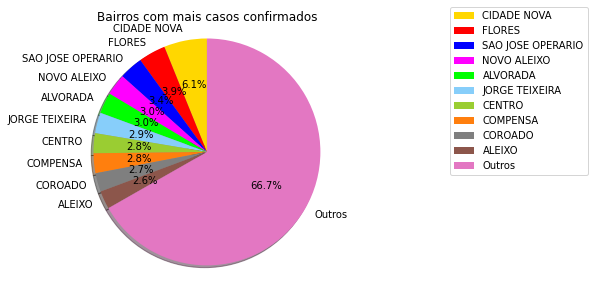

In [25]:

cores=['gold', 'red', 'blue', 'magenta', 'lime','lightskyblue',
       'yellowgreen', 'tab:orange', 'tab:gray', 'tab:brown',
        'tab:pink']

# Atribuindo um título ao gráfico
plt.title('Bairros com mais casos confirmados')

plt.pie(n_casos, labels=nome_locais, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(nome_locais, bbox_to_anchor=(1.3, 1.1))

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()

plt.show()

##### Distribuição dos 10 bairros com mais casos confirmados, incluindo demais bairros

## ----------------------------------------------------------------------------------------------------------

#### 2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

In [26]:
df['_sexo'].value_counts()

F    43798
M    35707
Name: _sexo, dtype: int64

In [27]:
df['_sexo']

130       F
144       F
153       F
158       F
196       F
         ..
243923    M
243973    M
243977    F
243979    F
243982    F
Name: _sexo, Length: 79505, dtype: object

        Modificamos o Dtpye da Coluna '_idade', de 'objet' para 'float', para aplicarmos o BoxPlot

In [28]:
df['_idade'] = df['_idade'].astype(float, errors = 'raise')

<AxesSubplot:title={'center':'_idade'}, xlabel='_sexo'>

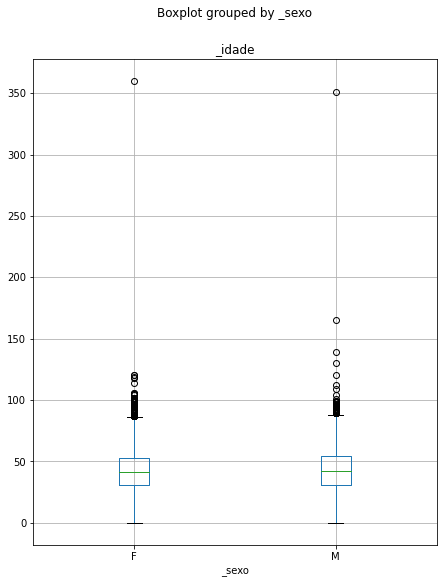

In [29]:
df.boxplot(column=['_idade'],by='_sexo',figsize=(7,9))

In [30]:
x = df.loc[df['_idade']>=150]

In [31]:
x.index

Int64Index([23221, 59744, 83432], dtype='int64')

Podemos considerar remover estes dados do Dataset([23222,59745,83433]), pois estes estão com dados incorretos.

#### Como podemos ver, há muitos outliners, acumulando principalmente entre as idades próximas a 80 e 100 anos,

# -----------------------------------------------------------------------------------------

#### 3 - Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados;

In [32]:
df['_dt_notificacao']=pd.to_datetime(df['_dt_notificacao'])
#fazemos a conversão da coluna para Datetime

    Realizamos a soma das datas de acordo com a data de notificação (value_counts()), realizamos a ordenacão dessas somas (sort_index()), e selecionamos os últimos 10 dias ([-10]), e aplicamos a plotagem.

<AxesSubplot:title={'center':'Casos novos confirmados nos últimos 10 dias'}>

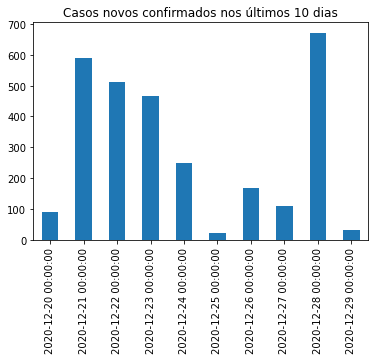

In [33]:
df['_dt_notificacao'].value_counts().sort_index()[-10:].plot.bar(title = 'Casos novos confirmados nos últimos 10 dias')

In [34]:
df['_dt_notificacao'].value_counts().sort_index()[-10:].mean()

290.5

#### Com o gráfico, verificamos a quantidade de novos casos, nos útimos 10 dias do DataSet, com uma média de 290 casos nesse intervalo.

# -----------------------------------------------------------------------------------------

#### 4- Repita o gráfico anterior considerando o número de casos recuperados;

    Realizamos a mesma ideia da questão passada: realizamos a contagem de acordo com as datas, ordenamos e separamos as 10 mais recentes.

<AxesSubplot:title={'center':'Casos recuperados nos últimos 10 dias'}>

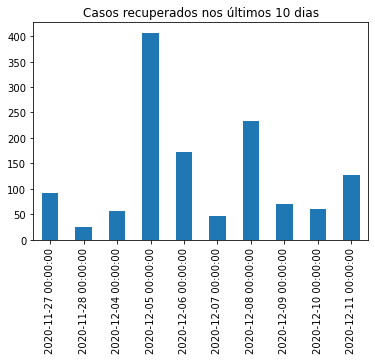

In [35]:
recuperados = df.loc[df['_conclusao']=='Recuperado']
recuperados['_dt_notificacao'].value_counts().sort_index()[-10:].plot.bar(title = 'Casos recuperados nos últimos 10 dias')

In [36]:
recuperados['_dt_notificacao'].value_counts().sort_index()[-10:].mean()

128.9

#### Com o gráfico, verificamos a quantidade dos ultimos casos recuperados, nos útimos 10 dias disponiveis no DataSet, com uma média de 129 recuperados nesse intervalo.

# ------------------------------------------------------------------------------------------------------

<h4> 5 - Construa um histograma que denote a quantidade percentual de casos por grupo etário, con-
siderando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.). </h4>

Para a averiguação do resultado do histograma será preenchida a coluna da faixa etária
com o resultado da função cut do pandas colocando como bins os valores que iniciam
os intervalos sugeridos, ignorando o membro a direita dos grupos.
> Ex: `[0,11]` irá colocar em um grupo `{0,1,2,3,4,5,6,7,8,9,10}`

In [37]:
bins = [0]
labels = []
max_age = 130

#conversão da coluna idade para tipo inteiro

df['_idade'] = df['_idade'].astype(int)
filtered_df = df[df['_idade'] <= max_age]
int_age = filtered_df['_idade']

#construção da lista de bins
for i in range(11,max_age,10):
        bins.append(i)

#construção da lista de labels a partir dos valores dos bins
for i in bins[:-1]:
    if i == 0:
        labels.append("{} a {} anos".format(i, i+10))
    else:
        labels.append("{} a {} anos".format(i, i+9))

#substituindo os valores da coluna existente de faixa etária pelos valores desejados
df['_faixa etária'] = pd.cut(int_age , bins=bins, labels=labels, right=False)

#agrupando os dados pelas faixas etárias semelhantes
age_range_group = df.groupby("_faixa etária")['_dt_notificacao'].count()

total_qtd = age_range_group.sum()
print("O total de registros é {}".format(total_qtd), end="\n\n")
print(age_range_group,end="\n\n")
for i in age_range_group:
    print("{} representa {:.2f} do total".format(i, i/total_qtd))

O total de registros é 79500

_faixa etária
0 a 10 anos        2551
11 a 20 anos       3873
21 a 30 anos      12231
31 a 40 anos      18917
41 a 50 anos      18200
51 a 60 anos      12310
61 a 70 anos       6808
71 a 80 anos       3114
81 a 90 anos       1219
91 a 100 anos       259
101 a 110 anos       11
111 a 120 anos        7
Name: _dt_notificacao, dtype: int64

2551 representa 0.03 do total
3873 representa 0.05 do total
12231 representa 0.15 do total
18917 representa 0.24 do total
18200 representa 0.23 do total
12310 representa 0.15 do total
6808 representa 0.09 do total
3114 representa 0.04 do total
1219 representa 0.02 do total
259 representa 0.00 do total
11 representa 0.00 do total
7 representa 0.00 do total


<h4>Aqui está a construção do histograma a partir da coluna de idade<h4>

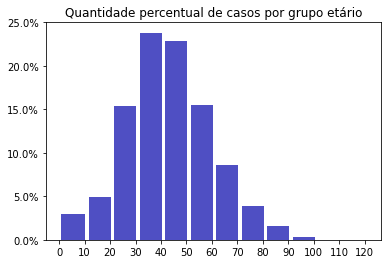

In [38]:
from matplotlib.ticker import PercentFormatter


plt.hist(int_age, bins=bins, color='#0504aa',alpha=0.7, rwidth=0.85, density=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(0.1))
plt.xticks(np.arange(0, bins[-1], 10))
plt.yticks(np.arange(0,0.03,0.005))
plt.title("Quantidade percentual de casos por grupo etário")
plt.show()

#### 6 - Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;

    Nesta atividade, selecionamos a coluna das datas de notificação, realizamos a soma dos casos nas respectivas datas. E realizmos a ordenação dos mesmos (sort_index()), logo em seguida utilizamos a função cumsum(), para realizar a soma acumulada de acordo com a ordem das datas.

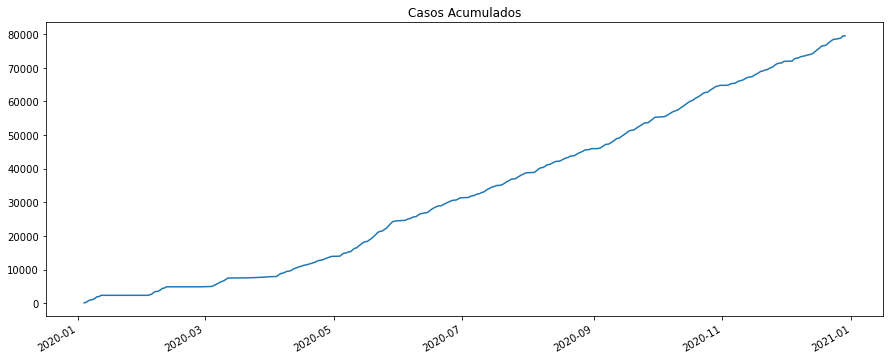

In [39]:
xxx = df['_dt_notificacao'].value_counts().sort_index().cumsum().plot(title = 'Casos Acumulados',figsize=(15,6))

#### Acumulado de casos confirmados

# ---------------------------------------------------------------------------------------

#### 7- Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento fetuado para o cálculo da correlação. É possível observar alguma tendência?


Para essa questão será aproveitado o processamento feito na questão 5

In [40]:
#Valores de idades únicas
ages = int_age.sort_values().unique()

#Agrupamento e contagem de quantitativo por idade
age_group_count = filtered_df.groupby("_idade")['_dt_notificacao'].count()
print("Quantidade de casos por idade")
print(age_group_count.sort_values(ascending=False).to_string())


Quantidade de casos por idade
_idade
38     2154
40     2106
39     2051
41     2038
37     2021
42     2016
43     1966
35     1948
44     1883
36     1867
45     1845
46     1816
34     1807
48     1699
32     1691
47     1689
49     1682
33     1671
31     1601
50     1566
51     1491
52     1439
29     1431
28     1403
53     1402
30     1381
27     1352
55     1316
26     1312
25     1285
54     1271
56     1225
24     1185
57     1167
58     1089
23     1062
59      971
22      961
60      939
61      879
21      859
63      796
62      794
20      789
64      730
0       708
65      687
66      684
67      650
19      590
69      553
70      521
68      514
71      450
18      435
72      435
17      398
73      348
16      341
75      337
1       333
15      326
74      322
76      296
14      284
77      262
13      255
12      232
78      229
11      223
80      218
79      217
2       210
10      197
7       175
82      174
81      172
5       170
3       165
4       159
9  

#### Plotting scatterplot

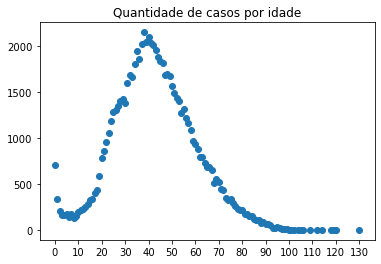

In [41]:
plt.scatter(ages, age_group_count)
plt.xticks(np.arange(0,ages[-1]+1,10))
plt.title("Quantidade de casos por idade")
plt.show()

Foi observada que a faixa etária de 30 a 50 anos contém mais casos

### 2.3 - Tipos de Tarefas

#### 1- Uma tarefa de classificação mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais métricas de desempenho poderiam ser aplicadas? Que tipo de validação seria apropriado?

A tarefa seria predizer se o paciente irá ter uma evolução positiva **(recuperação)** ou irá vir a **óbito** a partir dos dados. 

Os atributos preditores seriam: 
>_comorb_cardio, _comorb_cromossomica, _comorb_diabetes, _comorb_hemato, _comorb_hepatica, _comorb_imuno, _comorb_neurologica, _comorb_obesidade, _comorb_renal, _comorb_respiratória, _idade, _gestante , _raca, _bairro, _sexo, _sintoma_dispneia, _sintoma_febre, _sintoma_garganta, _sintoma_tosse, _sintoma_outros, _bairro, _distrito

o atributo alvo seria:
>_conclusao

 
Com relação as métricas de validação poderiam ser utilizadas: 
> Acurácia, Precisão, Revocação, F1 score.


Por lidar com questões relacionadas a vida do paciente e medidas visando preservá-la seria interessante utilizar um método de validação mais robusto como a Validação Kfold.

#### 2 -  Uma tarefa de regressão mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais tributos preditores a equipe considera relevantes para o cenário?

Predizer a taxa de recuperação do paciente a partir dos dados apresentados

O atributo alvo seria: 
>taxa

Os atributos preditores relevantes para o cenário seriam: 
>_comorb_cardio, _comorb_cromossomica, _comorb_diabetes, _comorb_hemato, _comorb_hepatica, _comorb_imuno, _comorb_neurologica, _comorb_obesidade, _comorb_renal, _comorb_respiratória, _idade, _gestante , _raca, _bairro, _sexo, _sintoma_dispneia, _sintoma_febre, _sintoma_garganta, _sintoma_tosse, _sintoma_outros, _bairro, _distrito

E a métrica de desempenho utilizada seria o MSE (Mean Squared Error)